<a href="https://colab.research.google.com/github/AHAMEDYUNUS/CAR_PRICE_PREDICTION-OIBSIP_TASK03-/blob/main/Car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**AHAMED YUNUS**

**CAR PRICE PREDICTION**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('/content/car data.csv')

In [5]:
data

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


#**EXPLORATORY DATA ANALYSIS**

In [6]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

**No missing value is available here**

In [7]:
data.duplicated().sum()

2

**There is 2 duplicates here. So we have to clear that.**

In [8]:
data1=data.drop_duplicates()

In [9]:
data1.duplicated().sum()

0

In [10]:
data1.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

In [11]:
data1.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    148
Driven_kms       206
Fuel_Type          3
Selling_type       2
Transmission       2
Owner              3
dtype: int64

In [12]:

data1.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508,0.043478
std,2.896868,4.984240,8.566332,39015.170352,0.248720
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.850000,1.200000,15000.000000,0.000000
50%,2014.000000,3.510000,6.100000,32000.000000,0.000000
75%,2016.000000,6.000000,9.840000,48883.500000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


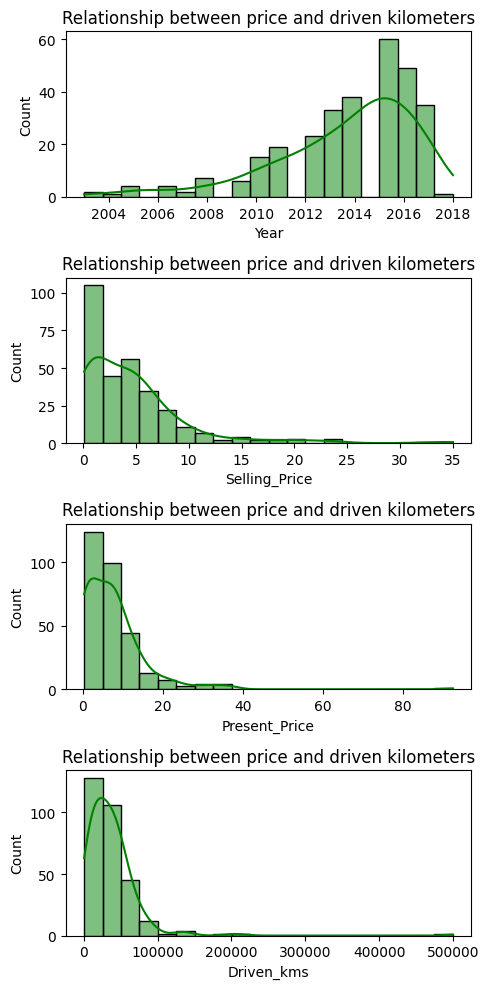

In [13]:
hcolor = 'Green'
num_features = ['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', ]
plt.figure(figsize=(5, 10))
for feature in num_features:
  plt.subplot(4, 1, num_features.index(feature) + 1)
  sb.histplot(data=data1[feature], bins=20, color=hcolor, kde=True)
  plt.title("Relationship between price and driven kilometers")
plt.tight_layout()
plt.show()

<Axes: xlabel='Year', ylabel='Selling_Price'>

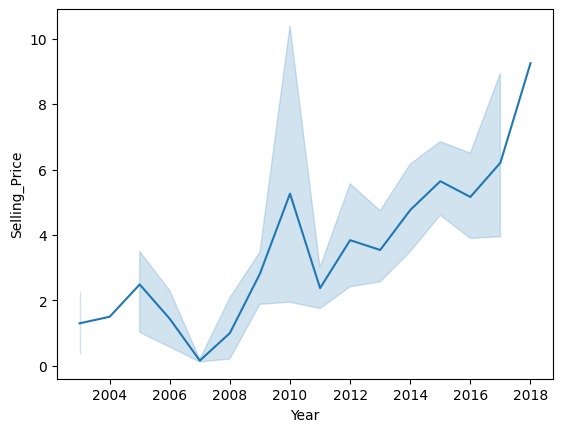

In [14]:
sb.lineplot(x="Year", y="Selling_Price", data=data1)

<Axes: xlabel='Year', ylabel='Driven_kms'>

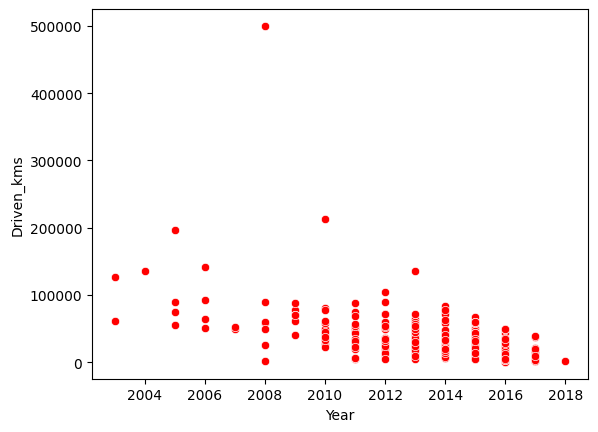

In [15]:
sb.scatterplot(x="Year", y="Driven_kms", data=data1, color='red')

<Axes: xlabel='Driven_kms', ylabel='Selling_Price'>

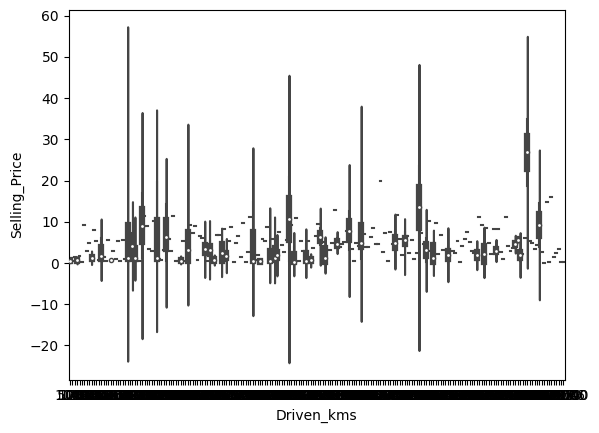

In [16]:
sb.violinplot(x="Driven_kms", y="Selling_Price", data=data1)

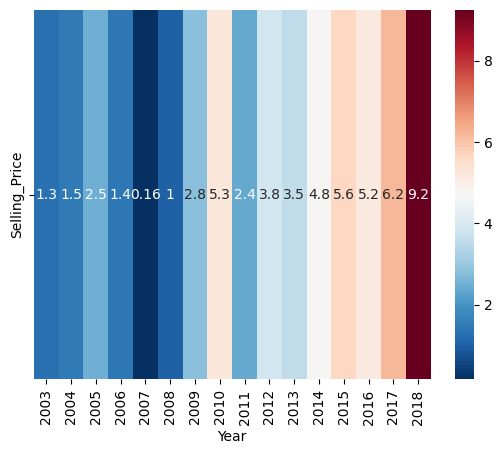

In [17]:
datapivot = data1.pivot_table(columns="Year", values="Selling_Price")
sb.heatmap(datapivot, cmap="RdBu_r", annot=True)
plt.show()

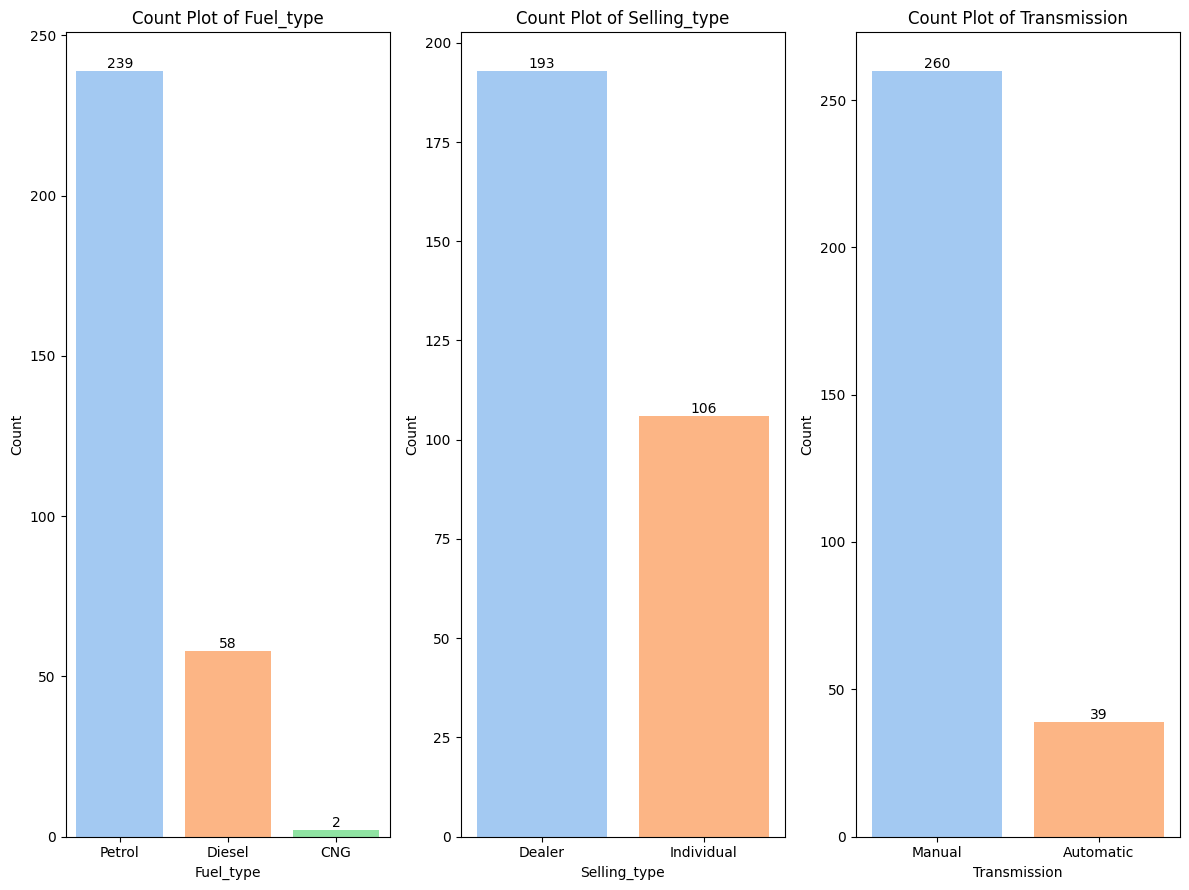

In [18]:
categorical_columns=['Fuel_Type', 'Selling_type', 'Transmission']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 9))
axes = axes.ravel()
for i, column in enumerate(categorical_columns):
    sb.countplot(x=data1[column], data=data1, palette='pastel', ax=axes[i], saturation=0.95)
    for container in axes[i].containers:
        axes[i].bar_label(container, color='black', size=10)
    axes[i].set_title(f'Count Plot of {column.capitalize()}')
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel('Count')
plt.tight_layout()
plt.show()

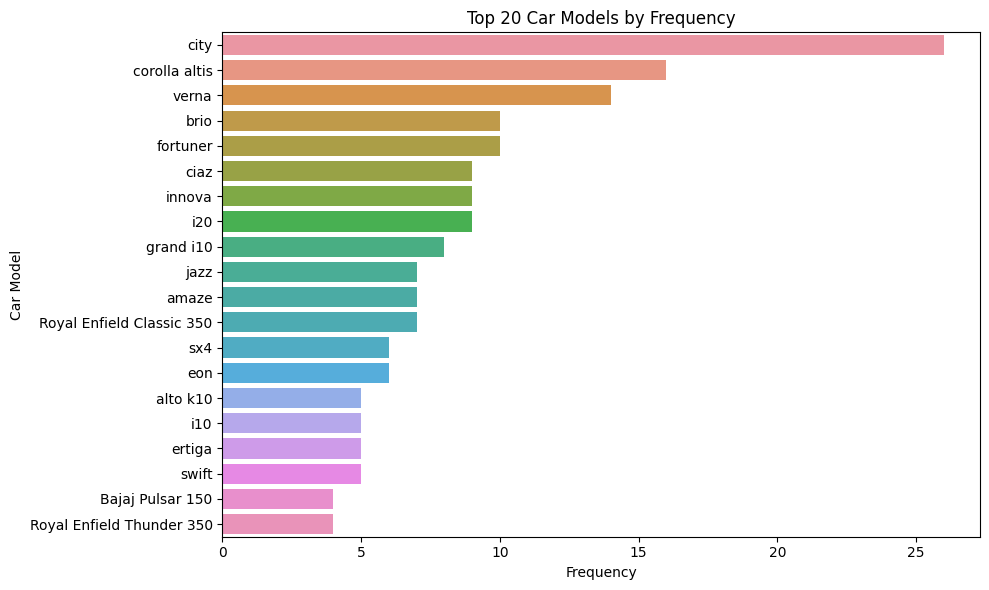

In [20]:
n = 20
top_car_models = data1['Car_Name'].value_counts().head(n)

plt.figure(figsize=(10, 6))
sb.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

In [21]:
avg_prices_by_car = data1.groupby('Car_Name')['Selling_Price'].mean().sort_values(ascending=False)

In [22]:
top_car_models = avg_prices_by_car.head(20)

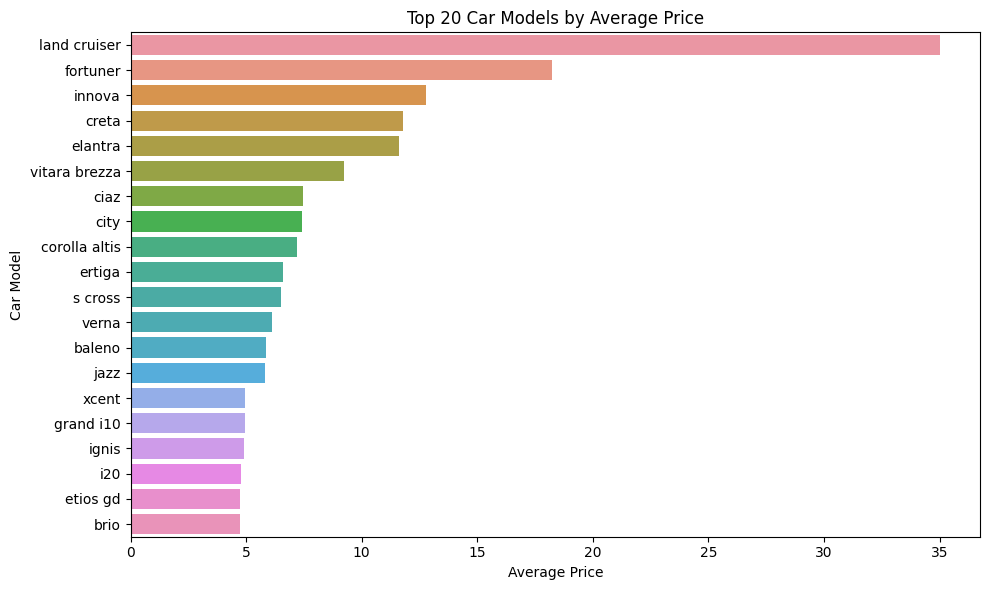

In [23]:
plt.figure(figsize=(10, 6))
sb.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Average Price')
plt.xlabel('Average Price')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

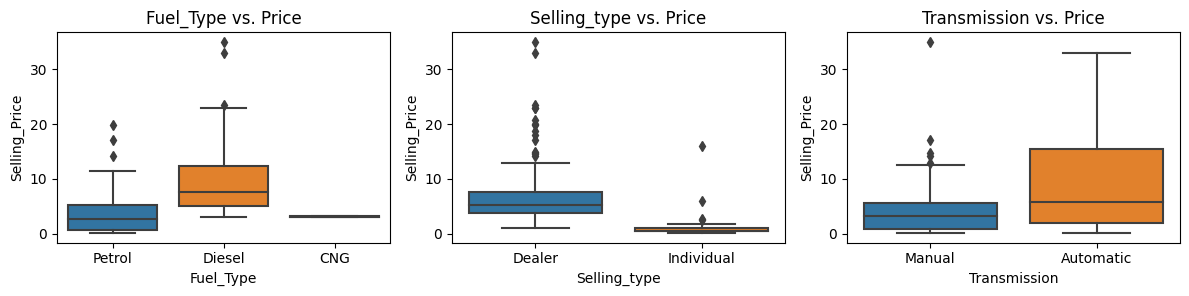

In [25]:
plt.figure(figsize=(12, 8))
for feature in categorical_columns:
    plt.subplot(3, 3, categorical_columns.index(feature) + 1)
    sb.boxplot(data=data1, x=feature, y='Selling_Price')
    plt.title(f'{feature} vs. Price')
plt.tight_layout()
plt.show()

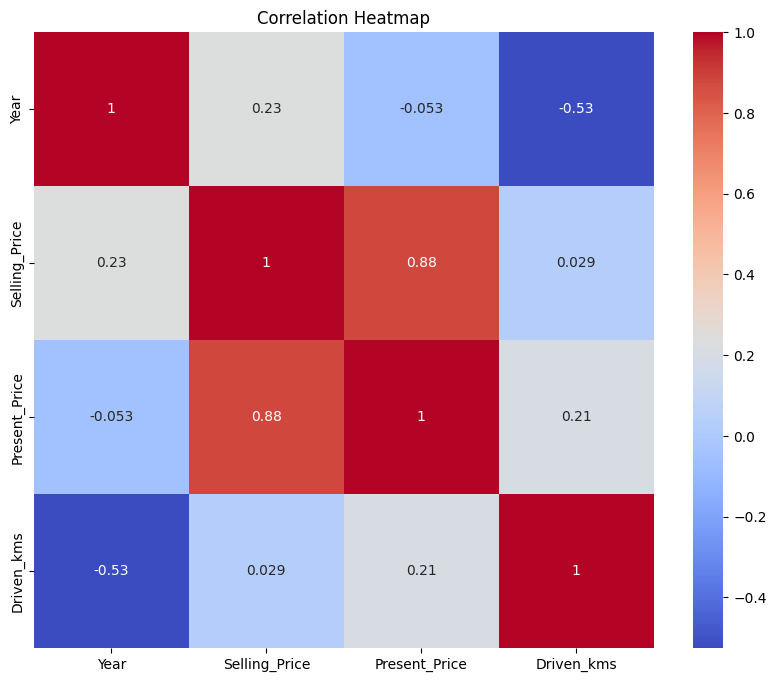

In [26]:
correlation_matrix = data1[num_features].corr()
plt.figure(figsize=(10, 8))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Data Pre-Processing**

In [27]:
data1['brand'] = data1['Car_Name'].apply(lambda x: x.split(' ')[0])
data1['model'] = data1['Car_Name'].apply(lambda x: ' '.join(x.split(' ')[1:]))

In [28]:
label_encoder = LabelEncoder()
for column in categorical_columns:
    data1[column] = label_encoder.fit_transform(data1[column])


In [29]:
numerical_columns = ['Selling_Price', 'Present_Price', 'Driven_kms']

In [30]:
scaler = StandardScaler()
data1[numerical_columns] = scaler.fit_transform(data1[numerical_columns])

In [83]:
import numpy as np
data1.replace('', np.nan, inplace=True)
data1.dropna(inplace=True)

In [81]:
X = data1.drop('Present_Price', axis=1)
y = data1['Present_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Training model**

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [82]:
mse = mean_squared_error(y_test, y_pred)
r2_square = r2_score(y_test,y_pred)
print(f" R-squared: {r2_square}")
print(f'Mean Squared Error: {mse}')

 R-squared: 0.6081243295124825
Mean Squared Error: 0.2927454660176853
